<a href="https://colab.research.google.com/github/Vamsi-Malineni/CS5691_PRML_Assignments/blob/main/Classification/Linearly_Separable_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# header files 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sn
from collections import Counter

# Reading the synthetic data into pandas dataframe
train_dataset = np.genfromtxt(r"/content/drive/MyDrive/Dataset/Dataset_1A/train.csv",delimiter=',')
feature_train = train_dataset[:,0:2] 
class_train = train_dataset[:,2]
dev_dataset = np.genfromtxt(r"/content/drive/MyDrive/Dataset/Dataset_1A/dev.csv",delimiter=',')
feature_dev = dev_dataset[0:int(0.5*len(dev_dataset)),0:2] 
class_dev = dev_dataset[0:int(0.5*len(dev_dataset)),2]
feature_test = dev_dataset[int(0.5*len(dev_dataset)):,0:2]
class_test = dev_dataset[int(0.5*len(dev_dataset)):,2]

# identifying number of classes in the data
classes = set(class_train)
class_count = len(classes)

# array to check various values of K used in classification
K = [1,7,15]

# number of values per features 
d = 2

In [2]:
# initialization to classify all points in a region
# generating meshgrid 
X1_lim = np.arange(start = feature_train[:,0].min()-1, stop = feature_train[:,0].max()+1,step = 0.15)
X2_lim = np.arange(start = feature_train[:,1].min()-1, stop = feature_train[:,1].max()+1,step = 0.15)
XX,YY = np.meshgrid(X1_lim,X2_lim)

#Converting XX,YY to 1D array, then changing its number of columns to 2
reshape_array = np.array([XX.ravel(),YY.ravel()]).T
assign_class_plot_boundary = np.zeros(len(reshape_array))

pos = np.empty(XX.shape + (2,))
pos[:, :, 0] = XX
pos[:, :, 1] = YY

# Plotting descision surface
def plotDecisionSurface(assign_class_plot_boundary,k):     
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(111)
    ax.contourf(XX,YY,assign_class_plot_boundary.reshape(XX.shape), cmap = 'Pastel1')
    ax.scatter(feature_train[:,0],feature_train[:,1],c = class_train, cmap = 'Dark2')
    plt.show()

In [3]:
# for printing Heatmap of the confusion matrix
# input : confusion matrix
def printheatmap(c):
    sn.heatmap(c,annot=True,fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() 

# returns the euclidian distance between 2 points 
# inputs : takes 2 points
def Euclidean_distance(data1,data2):
    return math.sqrt(sum((data1-data2)**2))




In [4]:
# returns the k nearest neighbours of the test instance
# input : the test instance ,the value of k
def get_neighbors(test_instance,k):
    distances = []
    for i in range(len(feature_train)):
        dist = Euclidean_distance(test_instance,feature_train[i])
        distances.append((feature_train[i], dist, class_train[i]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

# returns the class that has maximum number of neighbours
# input : list of k nearest neighbours
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

# returns the confusion matrix for all elements in data points
# inputs : value of k, data points, actual class labels for the data points
def KNN_classifier(k,data,label):
    predicted_class = np.zeros(len(label))
    confusion_matrix = np.zeros((class_count,class_count),dtype=int)
    for i in range(len(data)):
        predicted_class[i] = vote(get_neighbors(data[i],k))
        confusion_matrix[int(predicted_class[i])][int(label[i])]+=1
    return confusion_matrix




Confusion matrix for training data, when k = 1:


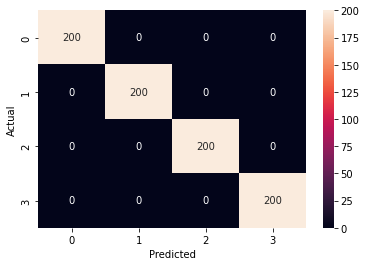


Confusion matrix for test data, when k = 1:


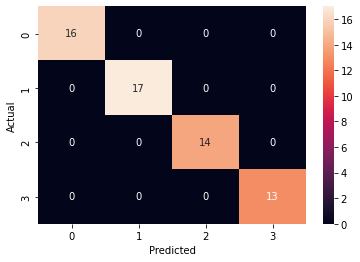


Decision Surface of the region, when k = 1:


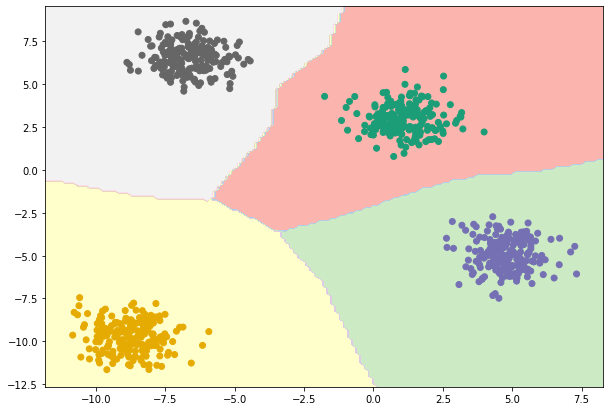

Accuracy on training data, when k = 1 : 100.0%

Accuracy on validation data, when k = 1 : 100.0%

Accuracy on test data, when k = 1 : 100.0%



Confusion matrix for training data, when k = 7:


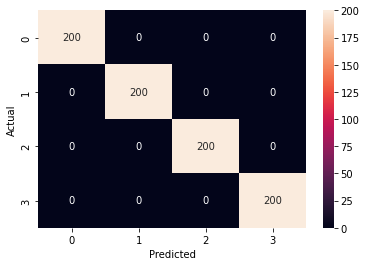


Confusion matrix for test data, when k = 7:


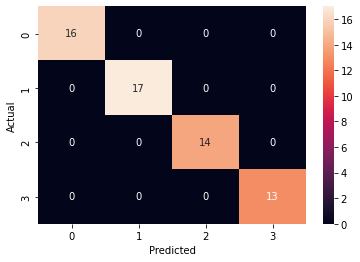


Decision Surface of the region, when k = 7:


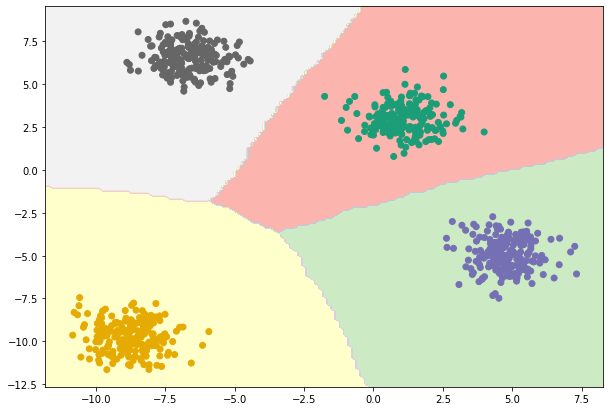

Accuracy on training data, when k = 7 : 100.0%

Accuracy on validation data, when k = 7 : 100.0%

Accuracy on test data, when k = 7 : 100.0%



Confusion matrix for training data, when k = 15:


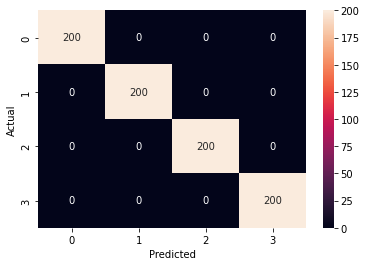


Confusion matrix for test data, when k = 15:


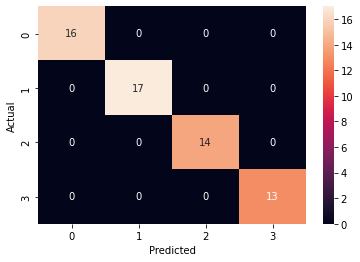


Decision Surface of the region, when k = 15:


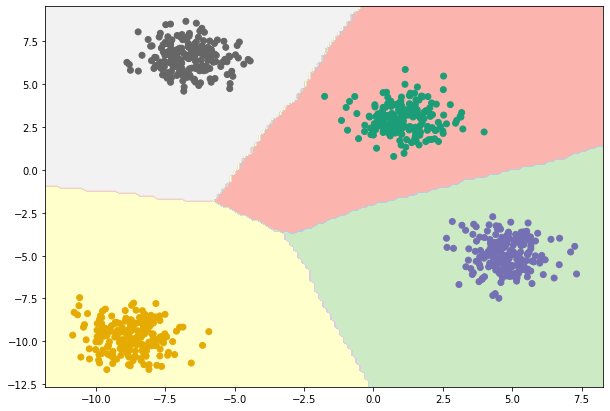

Accuracy on training data, when k = 15 : 100.0%

Accuracy on validation data, when k = 15 : 100.0%

Accuracy on test data, when k = 15 : 100.0%




In [5]:
# array to store the classification accuracies for each of the datasets
accuracy_dev = np.zeros(len(K))
accuracy_train = np.zeros(len(K))
accuracy_test = np.zeros(len(K))

for i in range(len(K)):
    confusion_matrix = KNN_classifier(K[i],feature_train,class_train)
    print("\nConfusion matrix for training data, when k = "+str(K[i])+":")
    printheatmap(confusion_matrix)
    accuracy_train[i] = np.trace(confusion_matrix)/len(class_train)*100
    confusion_matrix = KNN_classifier(K[i],feature_dev,class_dev)
    accuracy_dev[i] = np.trace(confusion_matrix)/len(class_dev)*100
    confusion_matrix = KNN_classifier(K[i],feature_test,class_test)
    print("\nConfusion matrix for test data, when k = "+str(K[i])+":")
    printheatmap(confusion_matrix)
    accuracy_test[i] = np.trace(confusion_matrix)/len(class_test)*100

    # Clasifying every point on meshgrid  
    for j in range(len(reshape_array)):
        assign_class_plot_boundary[j] = vote(get_neighbors(reshape_array[j],K[i]))

    # Plotting the decision surface
    print("\nDecision Surface of the region, when k = "+str(K[i])+":")
    plotDecisionSurface(assign_class_plot_boundary,K[i])

    print("Accuracy on training data, when k = "+str(K[i])+" : "+str(accuracy_train[i])+"%\n")
    print("Accuracy on validation data, when k = "+str(K[i])+" : "+str(accuracy_dev[i])+"%\n")
    print("Accuracy on test data, when k = "+str(K[i])+" : "+str(accuracy_test[i])+"%\n\n")

In [6]:
# function to generate the countour function for plotting
# input : mean and covariance of the distribution
def countour_function(mean,cov):
    gauss = 2*(math.pi)**(d/2)
    Sigma_det = np.linalg.det(cov)
    Sigma_inv = np.linalg.inv(cov)
    a = np.einsum('...k,kl,...l->...', pos-mean, Sigma_inv, pos-mean)

    return np.exp(-a / 2)/(gauss*np.sqrt(Sigma_det))

In [7]:
# Plots the contours of the probability destribution of each class using naive bayes
# input : classification region, means and covariances of each class distribution and mode to determine the form of covarince matrix to be used
def plotDecisionSurfaceNB(assign_class_plot_boundary,mean,cov,mode):
    # if all the class distributions have the same diagonal covariance matrix
    if(mode==0):
        I = np.identity(d)
        sigma_square = 0
        for i in range(class_count):
            sigma_square += np.trace(cov[i])/d
        sigma_square/=class_count
        for i in range(class_count):
            cov[i] = sigma_square*I

    # If all the class have the same covariance matrix
    if(mode==1):
        c = sum(cov)/class_count
        for i in range(class_count):
            cov[i] = c
    
    # else use the covariance matrices for each of the class distributions as calculated before

    Z =np.zeros((class_count,XX.shape[0],XX.shape[1]),dtype = float)
    for i in range(class_count):
        Z[i] = countour_function(mean[i],cov[i]) 

    #Plotting decision regions    
    fig2 = plt.figure(figsize = (14, 10))
    ax2 = fig2.gca(projection='3d')
    plt.xlim([min(feature_train[:,0])-6, max(feature_train[:,0])+6])
    plt.ylim([min(feature_train[:,1])-4, max(feature_train[:,1])+4])
    
    #for i in range(len_classlabel):
    ax2.plot_surface(XX, YY, Z[0],cmap='Reds',rstride=3, cstride=3, antialiased=True,alpha = 0.4)
    ax2.plot_surface(XX, YY, Z[1],cmap='Blues',rstride=3, cstride=3, antialiased=True,alpha = 0.8)
    ax2.plot_surface(XX, YY, Z[2],cmap='Greens',rstride=3, cstride=3, antialiased=True,alpha = 0.8)
    ax2.plot_surface(XX, YY, Z[3],cmap='Oranges',rstride=3, cstride=3, antialiased=True,alpha = 0.4)
    counto0 = ax2.contour(XX, YY,  Z[0],levels =9, offset=-0.15, cmap='hot')
    counto1 = ax2.contour(XX, YY,  Z[1],levels =9, offset=-0.15, cmap='winter')
    counto2 = ax2.contour(XX, YY,  Z[2],levels =9, offset=-0.15, cmap='summer')
    counto3 = ax2.contour(XX, YY,  Z[3],levels =9 ,offset=-0.15, cmap='autumn')
    ax2.set_zlim(-0.15,0.15)
    ax2.view_init(19, 60)
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('Z')
    plt.show()

    fig4 = plt.figure(figsize = (10, 7))
    ax4 = fig4.add_subplot(111)

    ax4.contour(XX, YY,  Z[0],levels =6, colors = 'green',alpha = 0.7)
    ax4.contour(XX, YY,  Z[1],levels =6, colors = 'blue',alpha = 0.7)
    ax4.contour(XX, YY,  Z[2],levels =6, colors = 'yellow',alpha = 0.7)
    ax4.contour(XX, YY,  Z[3],levels =6, colors = 'black',alpha = 0.7)
    ax4.contourf(XX, YY,assign_class_plot_boundary.reshape(XX.shape),cmap = 'Pastel1')    
    ax4.scatter(feature_train[:,0],feature_train[:,1],c = class_train, cmap = 'Dark2')
    ax4.set_xlabel('X1')
    ax4.set_ylabel('X2')
    plt.show()

In [8]:
# get the class distribution parameters for each of the class
# input : data points and their class labels
def getParameters(data,label):
    count = np.zeros(class_count)
    mean = np.zeros((class_count,2))
    cov = [np.zeros((d,d)) for rows in range(class_count)]
    class_dist = [[]for rows in range(class_count)]
    
    for i in range(len(data)):
        class_dist[int(label[i])].append(data[i])
    for i in range(class_count):
        count[i] = len(class_dist[i])
        mean[i] = sum(class_dist[i])/count[i]
        u = class_dist[i]-mean[i]
        cov[i] = u.transpose().dot(u)/count[i]
    count/=sum(count)
    return mean,count,cov

In [9]:
# returns log of gaussian probability that a given data points belongs to a particular class 
# input : the data point to be classfied, mean and covariance vectors of each of the class
def gaussianProbability(data,mean,cov):
    p = np.zeros(class_count)
    for i in range(class_count):
        p[i] = -0.5*(data-mean[i]).transpose().dot(np.linalg.inv(cov[i])).dot(data-mean[i])-d/2*np.log(2*math.pi)-0.5*np.log(np.linalg.det(cov[i]))
    return p

In [10]:
# returns the confusion matrix for the classification of a dataset
# inputs : dataset, class labels, mode used for covariance matrices of class distribution, probability of each class, covariance matrices of class distribution of each class
def naivebayes(data,label,mode,mean,p,cov):
    predicted_class = np.zeros(len(data))
    confusion_matrix = np.zeros((class_count,class_count),dtype = int)

    # if all the class distributions have the same diagonal covariance matrix
    if(mode==0):
        I = np.identity(d)
        sigma_square = 0
        for i in range(class_count):
            sigma_square += np.trace(cov[i])/d
        sigma_square/=class_count
        for i in range(class_count):
            cov[i] = sigma_square*I

    # If all the class have the same covariance matrix
    if(mode==1):
        c = sum(cov)/class_count
        for i in range(class_count):
            cov[i] = c
    # else use the covariance matrices for each of the class distributions as calculated before
    
    for i in range(len(data)):
        pr = gaussianProbability(data[i],mean,cov)+np.log(p)
        predicted_class[i] = np.where(pr==max(pr))[0][0]
        confusion_matrix[int(predicted_class[i])][int(label[i])]+=1
    return confusion_matrix


Confusion matrix for training data, when covariance matrix is sigma^2 I:


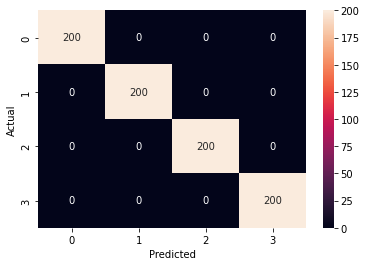


Confusion matrix for test data, when covariance matrix is sigma^2 I:


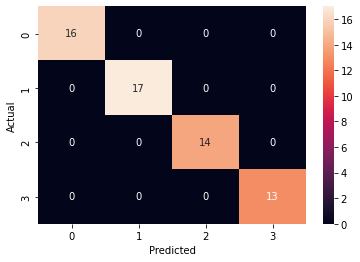


Decision Surface of the region, when covariance matrix is sigma^2 I:


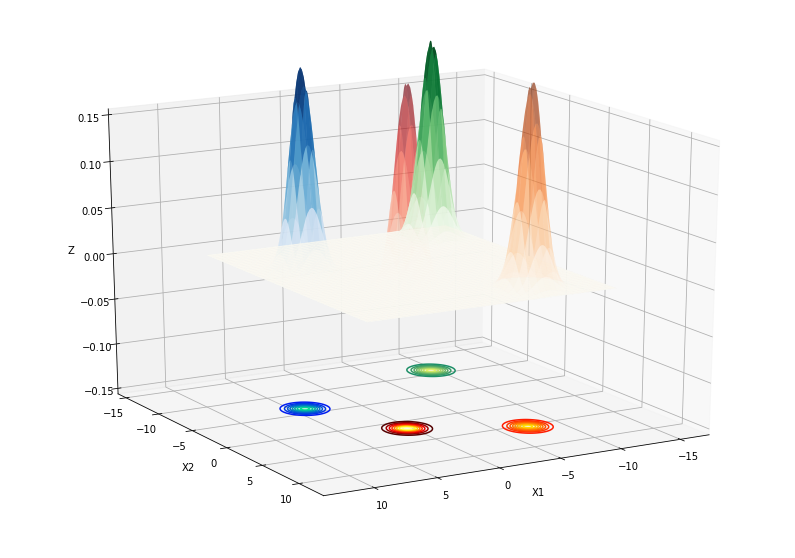

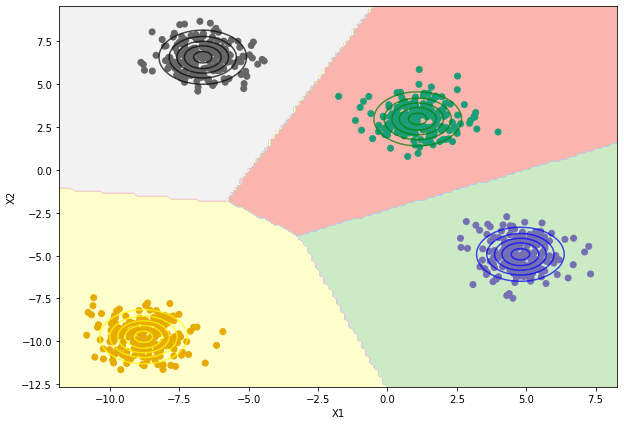

Accuracy on training data, when covariance matrix is sigma^2 I : 100.0%

Accuracy on validation data, when covariance matrix is sigma^2 I : 100.0%

Accuracy on test data, when covariance matrix is sigma^2 I : 100.0%



Confusion matrix for training data, when covariance matrix is diagonal:


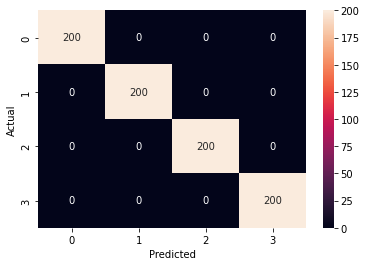


Confusion matrix for test data, when covariance matrix is diagonal:


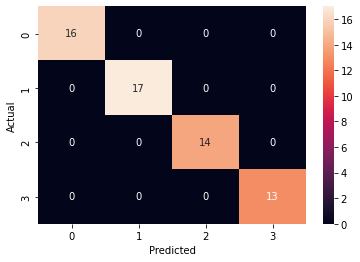


Decision Surface of the region, when covariance matrix is diagonal:


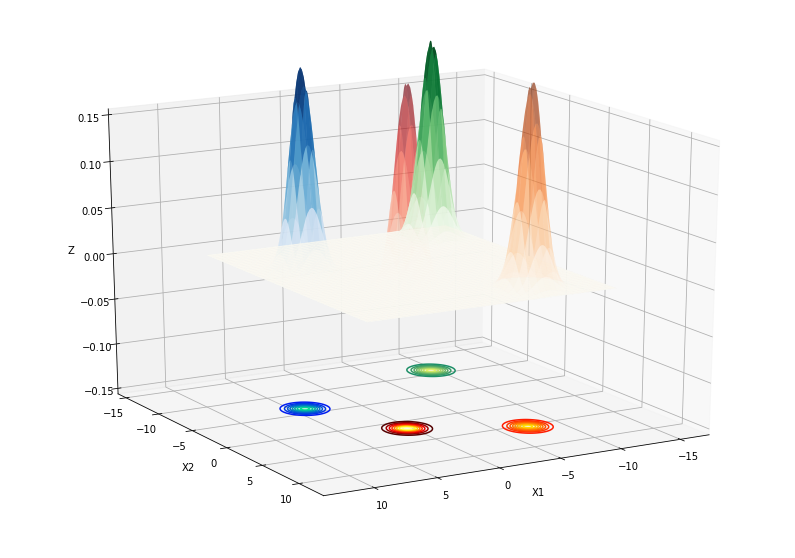

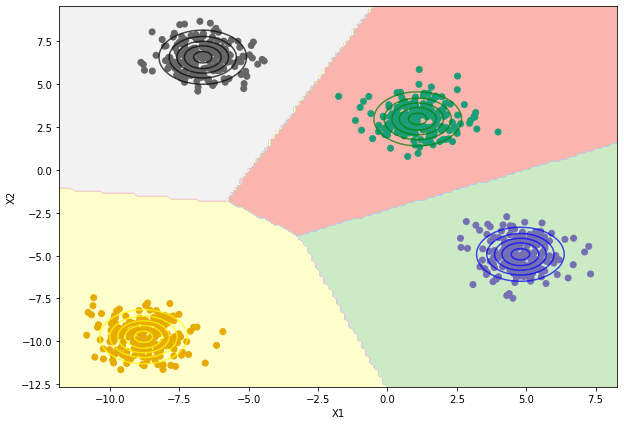

Accuracy on training data, when covariance matrix is diagonal : 100.0%

Accuracy on validation data, when covariance matrix is diagonal : 100.0%

Accuracy on test data, when covariance matrix is diagonal : 100.0%



Confusion matrix for training data, when covariance matrix is full:


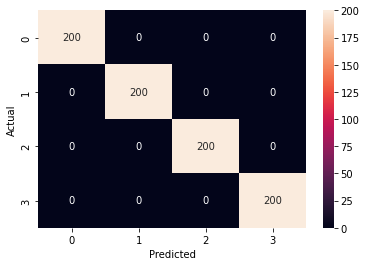


Confusion matrix for test data, when covariance matrix is full:


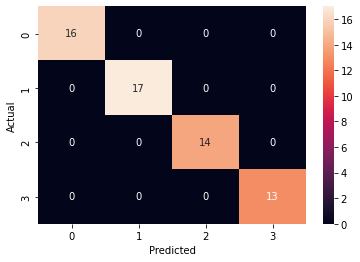


Decision Surface of the region, when covariance matrix is full:


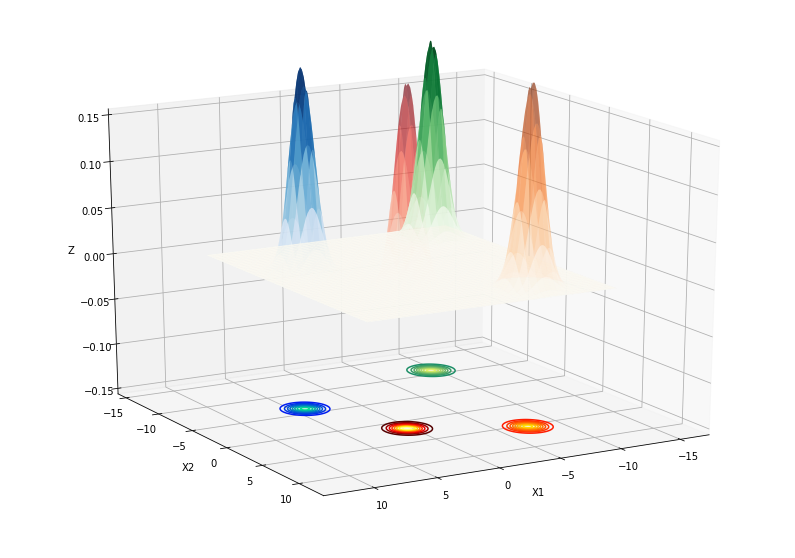

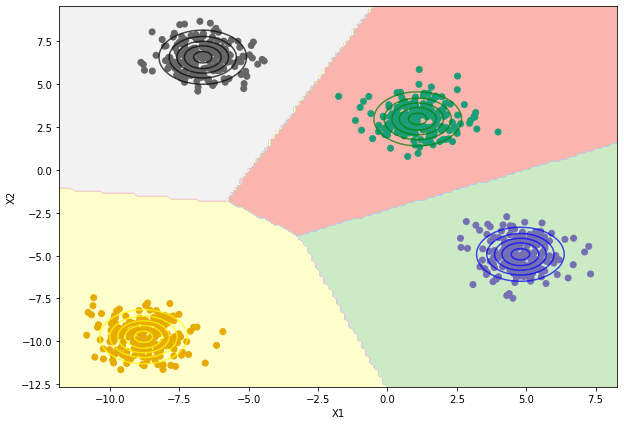

Accuracy on training data, when covariance matrix is full : 100.0%

Accuracy on validation data, when covariance matrix is full : 100.0%

Accuracy on test data, when covariance matrix is full : 100.0%




In [11]:
# array to store the classification accuracies for each of the datasets
accuracy_dev = np.zeros(3)
accuracy_train = np.zeros(3)
accuracy_test = np.zeros(3)

# to train the model and generate the parameters for classification
mean,p,cov = getParameters(feature_train,class_train)
for i in range(3):
    if (i == 0):
        covariance = "sigma^2 I"
    elif(i == 1):
        covariance = "diagonal"
    else:
        covariance = "full"
    confusion_matrix = naivebayes(feature_train,class_train,i,mean,p,cov)
    print("\nConfusion matrix for training data, when covariance matrix is "+covariance+":")
    printheatmap(confusion_matrix)
    accuracy_train[i] = np.trace(confusion_matrix)/len(feature_train)*100
    confusion_matrix = naivebayes(feature_dev,class_dev,i,mean,p,cov)
    accuracy_dev[i] = np.trace(confusion_matrix)/len(feature_dev)*100
    confusion_matrix = naivebayes(feature_test,class_test,i,mean,p,cov)
    print("\nConfusion matrix for test data, when covariance matrix is "+covariance+":")
    printheatmap(confusion_matrix)
    accuracy_test[i] = np.trace(confusion_matrix)/len(feature_test)*100
    
    #plotting decision surface
    for j in range(len(reshape_array)):
        pr = gaussianProbability(reshape_array[j],mean,cov)+np.log(p)
        assign_class_plot_boundary[j] = np.where(pr==max(pr))[0][0]
    
    print("\nDecision Surface of the region, when covariance matrix is "+covariance+":")
    plotDecisionSurfaceNB(assign_class_plot_boundary,mean,cov,i)

    print("Accuracy on training data, when covariance matrix is "+covariance+" : "+str(accuracy_train[i])+"%\n")
    print("Accuracy on validation data, when covariance matrix is "+covariance+" : "+str(accuracy_dev[i])+"%\n")
    print("Accuracy on test data, when covariance matrix is "+covariance+" : "+str(accuracy_test[i])+"%\n\n")
    